In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_data_points = 3

x = np.random.rand(num_data_points)*2 -1
y_p = np.random.rand(num_data_points)*2 - 1

X = np.array([(x[i], y_p[i]) for i in range(num_data_points)])
y = []
for index in range(num_data_points):
    if y_p[index] > x[index]:
        y.append([1])
    else:
        y.append([0])

y=np.array(y)

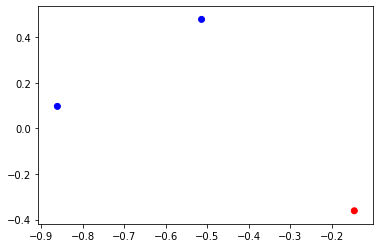

In [3]:
c = y.T[0]
c = np.where(c==0, 'red', c)
c = np.where(c=='1', 'blue', c)
plt.scatter(*zip(*X), c=c)
plt.show()

In [4]:
class node_class(object):
    def __init__(self, input_dim, learning_rate=0.1):
        #An array of weights, an additional weight is added for the dummy input `a_o = 1`
        self.W = np.random.rand(int(input_dim+1))
        self.learning_rate = learning_rate
        print("Creating node with length ", len(self.W))
        print("Weights ", self.W)
        
    def relu_activation(self, t):
        self.final_output = np.max([0,t])
        print("ReLu Activation! From ", t, " to ", self.final_output)
        return self.final_output
    
    def input_function(self, input_array):
        print("Input function!")
        self.input_array = np.append(input_array,1)
        self.input_sum = np.sum(self.input_array * self.W)
        print("Sum of [input_array * weights]")
        print("Input array: ", self.input_array)
        print("Weights: ", self.W)
        print("Input sum: ", self.input_sum)
        return self.input_sum
    
    #Consider removing
    def output(self, input_array):
        input_sum = self.input_function(input_array)
        return self.relu_activation(input_sum)
    
    def relu_der(self,t):
        if t>0:
            print("ReLu Derivative! From ", t, " to ", 1)
            return 1
        else:
            print("ReLu Derivative! From ", t, " to ", 0)
            return 0
        
    def calc_delta(self, actual_y=None, delta_js=None, weights=None, final_layer=False):
        if final_layer:
            print("Calc Delta @ Final Layer")
            print("Delta = relu_der[input_sum]*(actual_y-self.final_output)")
            print("Actual y: ", actual_y)
            print("Final output: ", self.final_output)
            self.delta = self.relu_der(self.input_sum)*(actual_y-self.final_output)
            print("New Delta: ", self.delta)
            return self.delta
        else:
            print("Calc Delta")
            print("Delta = self.relu_der[input_sum] * SUM(weights * delta_js)")
            print("Weights: ", weights)
            print("Deltas Js: ", delta_js)
            self.delta = self.relu_der(self.input_sum) * np.sum(np.array(weights) * delta_js)
            print("New Delta: ", self.delta)
            return self.delta
            
    def update_weights(self):
        print("Updating Weights")
        print("New Weights = self.W + (learning_rate * input_array * self.delta)")
        print("Old Weight: ", self.W)
        print("Input Array: ", self.input_array)
        print("Delta: ", self.delta)
        self.W = self.W + (self.learning_rate * self.input_array * self.delta)
        print("New Weights: ", self.W)

In [5]:
class NN(object):
    def __init__(self, layers, learning_rate=0.1):
        self.layers_nodes = []
        print("Creating layers!")
        for i, num_nodes in enumerate(layers):
            print("Layer ", i)
            if i==0:
                input_dim = num_nodes
                continue
                
            dim = input_dim
            self.layers_nodes.append([])
            for j in range(num_nodes):
                n = node_class(dim, learning_rate=learning_rate)
                self.layers_nodes[i-1].append(n)
                
            input_dim = num_nodes
            
        
            
    def evaluate(self, predictions, y, categorical=True):
        print("Evaluating!")
        if categorical:
            evals = []
            preds = np.array(predictions)
            preds = np.round(preds)
            for i in range(len(y)):
                print("Comparison: ", preds[i], y[i])
                if np.array_equal(preds[i], y[i]):
                    evals.append(1)
                    print("True!")
                else:
                    evals.append(0)
                    
            evals = np.array(evals)
            print("Acc: ", evals.mean())
            return evals.mean()
            
    def predict(self, X, y):
        preds = []
        
        print("Predicting!")
        for index, i in enumerate(X):
            outputs = [i]
            for h, layer in enumerate(self.layers_nodes):
                outputs.append([])
                for node in layer:
                    output = node.output(outputs[h])
                    outputs[h+1].append(output)
                    
            preds.append(outputs[-1])
                        
        return preds
            
    def train(self, X, y, epochs):
        accs = []
        
        print("Training!")
        for j in range(epochs):
            print("\nEpoch ",j)
            predictions = self.predict(X, y)
            acc = self.evaluate(predictions,y)
            accs.append(acc)
            if j%100 == 0:
                print('epoch ', j)
                print('acc: ', acc)
            for index, i in enumerate(X):
                
                outputs = [i]
                print("\nData point ", index)
                print("x=", i[0]," y=",i[1])
                for h, layer in enumerate(self.layers_nodes):
                    outputs.append([])
                    print("\nLayer ", h)
                    for f, node in enumerate(layer):
                        print("\nNode ", f)
                        output = node.output(outputs[h])
                        outputs[h+1].append(output)
                            
                delta_js = []
                layer_weights = []
                print("\n\nCalculating deltas")
                print("Reversing the layers")
                for h, layer in enumerate(reversed(self.layers_nodes)):
                    print("\nLayer ", h)
                    delta_js.append([])
                    layer_weights.append([])
                    for g, node in enumerate(layer):
                        print("\nNode ", g)
                        if h == 0:
                            delta_j = node.calc_delta(actual_y=y[index][g], final_layer=True)
                            layer_weights[h].append(list(node.W))
                            print("Adding layer_weights at layer ", h)
                        else:
                            weights = []
                            for n in layer_weights[h-1]:
                                weights.append(n[g])
                            delta_j = node.calc_delta(delta_js=delta_js[h-1], weights=weights)
                            layer_weights[h].append(list(node.W))
                            print("Adding layer_weights at layer ", h)
                            
                        delta_js[h].append(delta_j)

                        node.update_weights()
        return accs

In [6]:
#Number of nodes for each layer
#     First number is the input dimension
#     Last number is the output dimension
layers = [2,3,1]
nn = NN(layers, learning_rate = 0.1)

Creating layers!
Layer  0
Layer  1
Creating node with length  3
Weights  [0.06703355 0.61803559 0.117702  ]
Creating node with length  3
Weights  [0.69847766 0.97446813 0.83166656]
Creating node with length  3
Weights  [0.65192809 0.08522441 0.43446792]
Layer  2
Creating node with length  4
Weights  [0.34456486 0.27460302 0.10279573 0.78033839]


In [7]:
accuracies = nn.train(X,y,1)

Training!

Epoch  0
Predicting!
Input function!
Sum of [input_array * weights]
Input array:  [-0.8612824   0.09710861  1.        ]
Weights:  [0.06703355 0.61803559 0.117702  ]
Input sum:  0.11998375512149
ReLu Activation! From  0.11998375512149  to  0.11998375512149
Input function!
Sum of [input_array * weights]
Input array:  [-0.8612824   0.09710861  1.        ]
Weights:  [0.69847766 0.97446813 0.83166656]
Input sum:  0.3247092843706012
ReLu Activation! From  0.3247092843706012  to  0.3247092843706012
Input function!
Sum of [input_array * weights]
Input array:  [-0.8612824   0.09710861  1.        ]
Weights:  [0.65192809 0.08522441 0.43446792]
Input sum:  -0.11875024818202273
ReLu Activation! From  -0.11875024818202273  to  0.0
Input function!
Sum of [input_array * weights]
Input array:  [0.11998376 0.32470928 0.         1.        ]
Weights:  [0.34456486 0.27460302 0.10279573 0.78033839]
Input sum:  0.9108467329196474
ReLu Activation! From  0.9108467329196474  to  0.9108467329196474
In

In [8]:
preds = nn.predict(X,y)
preds = np.round(preds)

Predicting!
Input function!
Sum of [input_array * weights]
Input array:  [-0.8612824   0.09710861  1.        ]
Weights:  [0.0654888  0.61730746 0.11863155]
Input sum:  0.12217307169714679
ReLu Activation! From  0.12217307169714679  to  0.12217307169714679
Input function!
Sum of [input_array * weights]
Input array:  [-0.8612824   0.09710861  1.        ]
Weights:  [0.70088975 0.98328131 0.80690355]
Input sum:  0.2987246246093368
ReLu Activation! From  0.2987246246093368  to  0.2987246246093368
Input function!
Sum of [input_array * weights]
Input array:  [-0.8612824   0.09710861  1.        ]
Weights:  [0.65355321 0.08844724 0.42448421]
Input sum:  -0.1298206776002952
ReLu Activation! From  -0.1298206776002952  to  0.0
Input function!
Sum of [input_array * weights]
Input array:  [0.12217307 0.29872462 0.         1.        ]
Weights:  [0.34325479 0.2365725  0.07338919 0.69040792]
Input sum:  0.8030144452827993
ReLu Activation! From  0.8030144452827993  to  0.8030144452827993
Input function!

In [9]:
preds

array([[1.],
       [1.],
       [1.]])

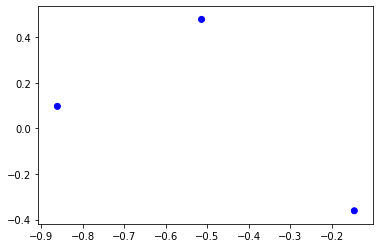

In [10]:
c = np.array(preds).T
c = np.where(c==0, 'red', c)
c = np.where(c=='1.0', 'blue', c)
plt.scatter(*zip(*X), c=c[0])
plt.show()

In [11]:
for layer in nn.layers_nodes:
    for node in layer:
        print(node.W)

[0.0654888  0.61730746 0.11863155]
[0.70088975 0.98328131 0.80690355]
[0.65355321 0.08844724 0.42448421]
[0.34325479 0.2365725  0.07338919 0.69040792]


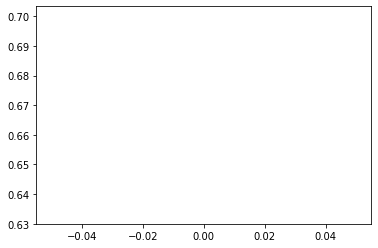

In [12]:
plt.plot(accuracies)

In [15]:
X

array([[-0.8612824 ,  0.09710861],
       [-0.14581713, -0.36153733],
       [-0.51393573,  0.47912064]])

In [16]:
y

array([[1],
       [0],
       [1]])

In [20]:
l = np.concatenate((X,y),1)

In [21]:
l

array([[-0.8612824 ,  0.09710861,  1.        ],
       [-0.14581713, -0.36153733,  0.        ],
       [-0.51393573,  0.47912064,  1.        ]])

In [41]:
m = l[:,:-1]
m

array([[-0.8612824 ,  0.09710861],
       [-0.14581713, -0.36153733],
       [-0.51393573,  0.47912064]])

In [38]:
m.reshape(-1,1)

array([[1.],
       [0.],
       [1.]])